In [2]:
from google.colab import files
uploaded = files.upload()

Saving life_expectancy.csv to life_expectancy.csv


In [3]:
print (uploaded['life_expectancy.csv'][:200].decode('utf-8') + '...')

Rank,Country,Overall Life,Male Life,Female Life,Continent
1,Monaco,89.5,85.6,93.5,Europe
2,Japan,85,81.7,88.5,Asia
3,Singapore,85,82.3,87.8,Asia
4,Macau; China,84.5,81.6,87.6,Asia
5,San Marino,83...


In [28]:
import pandas as pd
import numpy as np
from sklearn import datasets
import io

lifeExpectancy = pd.read_csv(io.StringIO(uploaded['life_expectancy.csv'].decode('latin-1')))
print(lifeExpectancy.head())


   Rank       Country  Overall Life  Male Life  Female Life Continent
0     1        Monaco          89.5       85.6         93.5    Europe
1     2         Japan          85.0       81.7         88.5      Asia
2     3     Singapore          85.0       82.3         87.8      Asia
3     4  Macau; China          84.5       81.6         87.6      Asia
4     5    San Marino          83.3       80.7         86.1    Europe


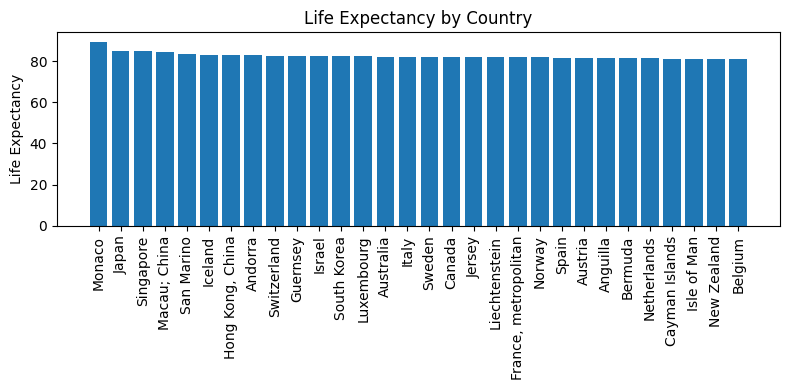

In [5]:
import matplotlib.pyplot as plt
top30 = lifeExpectancy[:30]

plt.figure(figsize=(8, 4))
plt.bar(top30['Country'], top30['Overall Life'])
plt.xticks(rotation=90)
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Country')
plt.tight_layout()
plt.show()

In [6]:
print(lifeExpectancy.Continent)

0      Europe
1        Asia
2        Asia
3        Asia
4      Europe
        ...  
218    Africa
219    Africa
220      Asia
221    Africa
222    Africa
Name: Continent, Length: 223, dtype: object


In [7]:
lifeExpectancy.isnull().sum()

,0
Rank,0
Country,0
Overall Life,0
Male Life,0
Female Life,0
Continent,0


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lifeExpectancy['Continent'] = le.fit_transform(lifeExpectancy['Continent'])

y = lifeExpectancy['Continent']
print(y.head())

# Encode the 'Continent' column for y
y = le.fit_transform(y)

# Drop the 'Continent' and 'Country' columns for x
lifeExpectancy.drop(['Continent', 'Country'], axis='columns', inplace=True)


x = lifeExpectancy

x

0    2
1    1
2    1
3    1
4    2
Name: Continent, dtype: int64


,Rank,Overall Life,Male Life,Female Life
0,1,89.5,85.6,93.5
1,2,85.0,81.7,88.5
2,3,85.0,82.3,87.8
3,4,84.5,81.6,87.6
4,5,83.3,80.7,86.1
...,...,...,...,...
218,219,52.1,51.6,52.5
219,220,51.6,52.2,51.0
220,221,51.3,49.9,52.7
221,222,50.6,48.6,52.7


In [30]:
y

array([2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 3, 3, 4,
       0, 2, 2, 3, 2, 1, 5, 3, 2, 1, 3, 3, 2, 3, 2, 2, 3, 3, 1, 4, 5, 3,
       4, 1, 2, 1, 1, 4, 5, 5, 5, 2, 3, 0, 0, 5, 5, 1, 2, 2, 3, 0, 2, 2,
       4, 0, 2, 2, 3, 4, 5, 5, 3, 1, 0, 1, 1, 2, 4, 3, 3, 1, 4, 2, 1, 1,
       1, 2, 1, 1, 3, 0, 1, 2, 1, 2, 2, 3, 3, 1, 5, 1, 5, 4, 3, 4, 1, 1,
       3, 4, 4, 4, 3, 2, 0, 4, 1, 2, 3, 3, 3, 5, 0, 2, 1, 3, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 5, 1, 3, 1, 5, 1, 1, 1, 4, 4, 1, 0, 4, 4, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [31]:
from sklearn.preprocessing import StandardScaler
# Import train_test_split function
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3) # 70% training and 30% test

The best k-value could be found by iterating a set amount of values and then comparing the score to choose the best one.

In [32]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)


In [33]:
knn.score(X_test, y_test)

0.47761194029850745

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x, y,cv=3)
np.average(scores)

np.float64(0.31423423423423424)

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  2,  1,  0,  1],
       [ 3,  4,  0,  0,  1,  2],
       [ 0,  2, 10,  2,  0,  2],
       [ 1,  5,  2,  1,  2,  0],
       [ 2,  1,  2,  1,  1,  1],
       [ 0,  0,  2,  0,  0,  0]])